# Linear Regression

### Load Data
We load data from the web
- london gold index (LBMA/GOLD)
- london silver index (LBMA/SILVER)

In [1]:
import linear_regression
from linear_regression import *
%matplotlib inline

# We use the london market to get the stock values of gold and silver
gold = quandl.get("LBMA/GOLD", returns="numpy", start_date="2015-01-01")
silver = quandl.get("LBMA/SILVER", returns="numpy")

/usr/local/lib/python2.7/dist-packages/requests/packages/urllib3/util/ssl_.py:334: SNIMissingWarning: An HTTPS request has been made, but the SNI (Subject Name Indication) extension to TLS is not available on this platform. This may cause the server to present an incorrect TLS certificate, which can cause validation failures. You can upgrade to a newer version of Python to solve this. For more information, see https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  SNIMissingWarning
/usr/local/lib/python2.7/dist-packages/requests/packages/urllib3/util/ssl_.py:132: InsecurePlatformWarning: A true SSLContext object is not available. This prevents urllib3 from configuring SSL appropriately and may cause certain SSL connections to fail. You can upgrade to a newer version of Python to solve this. For more information, see https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecurePlatformWarning
/usr/local/lib/python2.7/dist-packages/requests/pac

### Format Data

We downloaded the london daily gold and silver values in dollars of the past two years. For each days (x_silver or x_gold), we have gold value (y_gold) and the silver value (y_silver) in dollars.

We vizualize gold and silver values in time (left plot) and visualize how gold value depends on silver (right plot).

/usr/local/lib/python2.7/dist-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


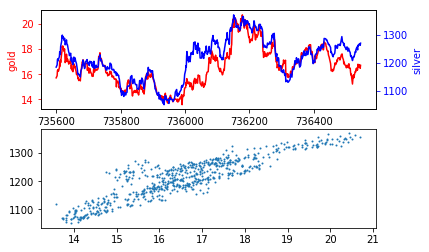

In [2]:
# Retrieve gold and silver values in $ by day
XY_gold = stock_arr_to_XY(gold)
XY_silver = stock_arr_to_XY(silver)

# Filter arrays such that gold and silver shares the same Xs
XY_gold, XY_silver = filter_on_same_X(XY_gold, XY_silver)
x_gold, y_gold = XY_gold
x_silver, y_silver = XY_silver

# Plot the data
plot_data(XY_silver, XY_gold)

# Linear Regression

### Train Linear Regression On Gold knowing Silver

(In case of doubts, read this : http://cs229.stanford.edu/notes/cs229-notes1.pdf)

We want to know whether the gold and the silver values are correlated. We hypothesize that the price of Gold (y_gold or Y) is linearly equal to the one of Silver (y_silver or X) : `P = w*X + b.` Where 'w' (the weight) and 'b' (the bias) are the linear parameters of our hypothesis (or prediction).

We are going to set the weight and bias to some random values and compute how far our predictions 'P' are from the true gold value 'Y'. They are many distances we can chose from, one of which is the sum of squares (L2 distance) : `L = \sum_i 1/2*(y^i - p^i)^2` ('L' stands for Loss, it's also called cost function...).


In [3]:
# Rename y_silver to X and y_gold to Y
_, X, Y = np.array(x_silver), np.array(y_silver), np.array(y_gold)

# Initilize the parameters
Ws = [0.5, 0.5]
alphas = (0.0001, 0.01)

# Load Trainer
t = Trainer(X, Y, Ws, alphas)

# Define Prediction and Loss
t.pred = lambda X : np.multiply(X, t.Ws[0]) + t.Ws[1]
t.loss = lambda : np.power((t.Y - t.pred(X)), 2) * 1 / 2.

# Define the gradient functions
dl_dp = lambda : -(t.Y - t.pred(X))
dl_dw0 = lambda : np.multiply(dl_dp(), X).mean()
dl_dw1 = lambda : dl_dp().mean()
t.dWs = (dl_dw0, dl_dw1)

# Start training
anim = t.animated_train(is_notebook=True)

# Show it
from IPython.display import HTML
HTML(anim.to_html5_video())